## Youtube API
- Let's use Google's Youtube API to collect video data for two popular shows: BuzzFeed Unsolved and BuzzFeed Taste Test
- We will present the visualizations saved here and any notable trends or correlations at the site: https://ying-li-python.github.io/web-visualization/

### Resources
- We will use matplotlib, pandas, and scipy

In [ ]:
import json
import requests

from pprint import pprint
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from config import gkey 

## Video Retrieval For BuzzFeed Unsolved

In [72]:
# request video ID from "BuzzFeed Unsolved Search"
term = input("Enter a search term: ").replace(" ", "+")
base_url = "https://www.googleapis.com/youtube/v3/"
search_url = base_url + ("search?part=snippet&maxResults=50&q={0}&key={1}").format(term, gkey)
response = requests.get(search_url).json()

# check response
pprint(response)

Enter a search term: buzzfeed unsolved
{'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/PkOtK3PYF7zHCbqIyXx2k23Liik"',
 'items': [{'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/1PvKGnavhiuY4MarRog6SSzXCC8"',
            'id': {'channelId': 'UCKijjvu6bN1c-ZHVwR7-5WA',
                   'kind': 'youtube#channel'},
            'kind': 'youtube#searchResult',
            'snippet': {'channelId': 'UCKijjvu6bN1c-ZHVwR7-5WA',
                        'channelTitle': 'BuzzFeed Unsolved Network',
                        'description': 'Welcome to BuzzFeed Unsolved Network! '
                                       'This is your one-stop destination for '
                                       'all things mystery, true crime, '
                                       'conspiracy, supernatural, and '
                                       'everything in ...',
                        'liveBroadcastContent': 'upcoming',
                        'publishedAt': '2018-05-14T21:00:36.000Z',
                        'thumbna

                                       'high': {'height': 360,
                                                'url': 'https://i.ytimg.com/vi/IM31fgkxn2I/hqdefault.jpg',
                                                'width': 480},
                                       'medium': {'height': 180,
                                                  'url': 'https://i.ytimg.com/vi/IM31fgkxn2I/mqdefault.jpg',
                                                  'width': 320}},
                        'title': 'Return To The Horrifying Winchester '
                                 'Mansion'}},
           {'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/qYZvk1EAZk6_DGxhGKf6KDXlAW0"',
            'id': {'kind': 'youtube#video', 'videoId': 'ndvtrRUySdk'},
            'kind': 'youtube#searchResult',
            'snippet': {'channelId': 'UCKijjvu6bN1c-ZHVwR7-5WA',
                        'channelTitle': 'BuzzFeed Unsolved Network',
                        'description': "Why didn't the family just set traps? "

In [73]:
# collect video ID in list
snippet_list = response["items"]

video_list = []

for item in snippet_list: 
    i = item.get("id")
    
    for v in i.items(): 
        video_id = i.get("videoId")
    video_list.append(video_id)
    
# check videos  
print(video_list)

[None, 'tmvGpPcqCao', 'GaLdHd2J-xM', 'N-FqJzC3tA8', 'PkUg89kLLBE', 'xBoKesAQFHU', 'Bh9lIfocRMk', None, None, 'YCnFYvL17v4', '9GR3XSuInYE', 'SiQ4t2EuhKU', '87y1_IbJRZE', 'qg2nGY1aqlg', '4aLfKYD_bGw', 'XG4rnKlgCN8', '5YYXyBq7e3A', 'XEZfGlyLQnA', 'cDZweMXXY6Y', 'mpf2Nqx49dM', '1KgSp94nCZw', 'b8WnPAxVxRY', 'B_ZaFmX72EY', None, 'XHXLbp7x3MM', '8bKf3IOyaRw', 'CupbRr2m_sM', 'Mx8JkGHaGUI', '6U_avfWqwf4', 'Dcc3Hq4gjW4', 'YLmDE_JYUNU', 'YrMGIqecu0Y', 'Iv7PW4ZEFD4', 'nMsFNvyYCJA', 'IM31fgkxn2I', 'ndvtrRUySdk', 'oHSehKtDyoI', 'UzIxYdWVbm0', 'y__v0aEgzO0', 'sHMGMddHT6Q', 'z0AKoCMydkc', 'qr4MSVxfYBE', 'bQpNdevrtiM', 'r1gxEVT18w8', 'nyVOi3X53bk', 'LXhLlWQtdt0', '48jBi86ih5Q', 'BnxfuvRHKDk', '4hVrSEWrKDY', '8-48Efx07ig']


In [75]:
# add video ID to dataframe, drop values that are None
video_df = pd.DataFrame(video_list)
video_df = video_df.rename(columns={0: "Video ID"})
cleaned_df = video_df.dropna()

# check data
cleaned_df.head()

,Video ID
1,tmvGpPcqCao
2,GaLdHd2J-xM
3,N-FqJzC3tA8
4,PkUg89kLLBE
5,xBoKesAQFHU


In [76]:
# create empty columns to store video information
cleaned_df["Video Title"] = ""
cleaned_df["Channel Name"] = ""
cleaned_df["Channel ID"] = ""
cleaned_df["Comment Count"] = ""
cleaned_df["View Count"] = ""
cleaned_df["Like Count"] = ""

# for loop to retrieve view count, comment count, like count for each video
for index, row in cleaned_df.iterrows():
    video = row["Video ID"]
    index = index
    
    final_url = base_url + ("videos?part=snippet%2C+statistics&id={0}&key={1}").format(video, gkey)
    final_results = requests.get(final_url).json()
    vid_response = final_results["items"]
    #pprint(vid_response)
    
    for i in vid_response:
        t = i.get("snippet").get("title")
        c = i.get("snippet").get("channelTitle")
        d = i.get("snippet").get("channelId")

       
        comment_count = i.get("statistics").get("commentCount")
        view_count = i.get("statistics").get("viewCount")
        like_count = i.get("statistics").get("likeCount")
      

        cleaned_df.loc[index, "Video Title"] = t
        cleaned_df.loc[index, "Channel Name"] = c
        cleaned_df.loc[index, "Channel ID"] = d
        cleaned_df.loc[index, "Comment Count"] = comment_count
        cleaned_df.loc[index, "View Count"] = view_count
        cleaned_df.loc[index, "Like Count"] = like_count
               
# check dataframe 
cleaned_df.head()

,Video ID,Video Title,Channel Name,Channel ID,Comment Count,View Count,Like Count
1,tmvGpPcqCao,Florida Machete Murder - Q+A,BuzzFeed Unsolved Network,UCKijjvu6bN1c-ZHVwR7-5WA,1246,247124,16587
2,GaLdHd2J-xM,The Suspicious Case of the Reykjavik Confessions,BuzzFeed Unsolved Network,UCKijjvu6bN1c-ZHVwR7-5WA,10003,3544441,106925
3,N-FqJzC3tA8,The Unusual Australian Shark Arm Murders,BuzzFeed Unsolved Network,UCKijjvu6bN1c-ZHVwR7-5WA,9315,2948554,106073
4,PkUg89kLLBE,The Haunting of Hannah Williams,BuzzFeed Unsolved Network,UCKijjvu6bN1c-ZHVwR7-5WA,37223,7473727,220389
5,xBoKesAQFHU,The Eerie Case Of The Watcher,BuzzFeed Unsolved Network,UCKijjvu6bN1c-ZHVwR7-5WA,18843,4756090,185413


In [195]:
# save as csv file 
cleaned_df.to_csv("output.csv", index=False)

In [77]:
# check data type 
cleaned_df.dtypes

Video ID         object
Video Title      object
Channel Name     object
Channel ID       object
Comment Count    object
View Count       object
Like Count       object
dtype: object

In [78]:
# convert datatypes to integer
cleaned_df["Comment Count"]=pd.to_numeric(cleaned_df["Comment Count"]) 
cleaned_df["View Count"]=pd.to_numeric(cleaned_df["View Count"]) 
cleaned_df["Like Count"] = pd.to_numeric(cleaned_df["Like Count"])

# check datatypes
cleaned_df.dtypes

Video ID         object
Video Title      object
Channel Name     object
Channel ID       object
Comment Count     int64
View Count        int64
Like Count        int64
dtype: object

In [170]:
# statistics for view count vs like count for BuzzFeed Unsolved
like_count = cleaned_df.iloc[:,6]
view_count = cleaned_df.iloc[:,5]
slope, intercept, r_value, p_value, std_err = stats.linregress(view_count, like_count)
print(f"Slope: {slope}, Intercept: {intercept}, r-value: {r_value}, r-squared: {r_value**2}, p-val: {p_value}, std-err: {std_err}")


Slope: 0.012943563970468957, Intercept: 54037.96652163658, r-value: 0.8355079619966227, r-squared: 0.69807355455975, p-val: 5.124190311704296e-13, std-err: 0.0012832980087620265


In [171]:
# statistics for comment count vs like count for BuzzFeed Unsolved
comment_count = cleaned_df.iloc[:,4]
slope, intercept, r_value, p_value, std_err = stats.linregress(comment_count, like_count)
print(f"Slope: {slope}, Intercept: {intercept}, r-value: {r_value}, r-squared: {r_value**2}, p-val: {p_value}, std-err: {std_err}")

Slope: 4.8988925276613156, Intercept: 51537.80732918273, r-value: 0.9000343933619059, r-squared: 0.8100619092343341, p-val: 1.781415570323492e-17, std-err: 0.3576172853987258


In [86]:
# stats 
cleaned_df.describe()

,Comment Count,View Count,Like Count
count,46.000000,4.600000e+01,46.000000
mean,17767.391304,6.531461e+06,138578.347826
std,12698.127383,4.461442e+06,69115.982469
min,867.000000,2.425710e+05,9689.000000
25%,8832.500000,3.108179e+06,89031.000000
50%,16519.500000,6.470848e+06,147736.500000
75%,24538.000000,9.495047e+06,194773.000000
max,60835.000000,2.026514e+07,304736.000000


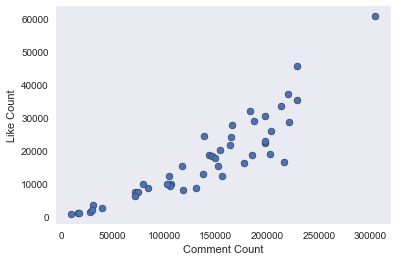

In [87]:
# create scatter plot for like count vs. comment count
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df["Like Count"], cleaned_df["Comment Count"], edgecolors='black')

plt.ylabel("Like Count")
plt.xlabel("Comment Count")
plt.grid()
plt.gcf()
plt.savefig("like_vs_comments.png", bbox_inches="tight")
plt.show()

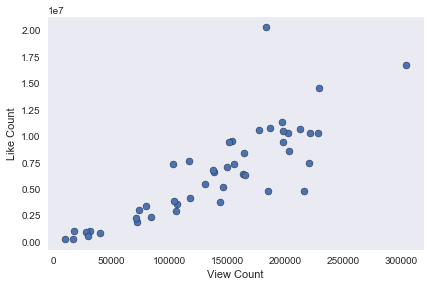

In [214]:
# create scatter plot for like count vs. view count 
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df["Like Count"], cleaned_df["View Count"], edgecolors='black')

plt.ylabel("Like Count")
plt.xlabel("View Count")
plt.grid()
plt.savefig("like_vs_views.png", bbox_inches="tight")
plt.show()

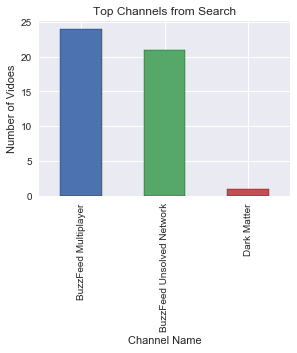

In [223]:
# create bar plot showing top channels 
plt.figure(figsize=(4,3))
pp_df = cleaned_df.groupby("Channel Name")["View Count"].count().sort_values(ascending=False)
pp_df.plot(kind="bar", edgecolor="black")

plt.title("Top Channels from Search")
plt.ylabel("Number of Vidoes")

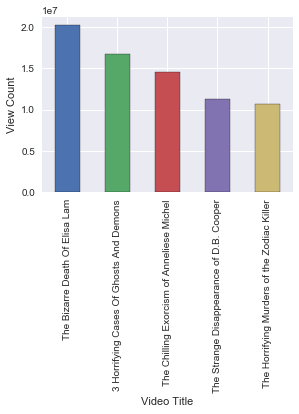

In [225]:
# create bar plot showing top 5 videos 
ss_df = cleaned_df.groupby("Video Title")["View Count"].sum().sort_values(ascending=False).head(5)
ss_df.plot(kind="bar", edgecolor="black", figsize=(4,3))
plt.ylabel("View Count")
plt.gcf()
plt.show()

## Video Retrieval For BuzzFeed Taste Test


In [121]:
# request video ID from "BuzzFeed Unsolved Search"
term = input("Enter a search term: ").replace(" ", "+")
base_url = "https://www.googleapis.com/youtube/v3/"
search_url = base_url + ("search?part=snippet&maxResults=50&q={0}&key={1}").format(term, gkey)
response = requests.get(search_url).json()

# check response
pprint(response)

Enter a search term: buzzfeed taste tests
{'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/7uI6iL2874KK7sB9InYH8cBOrE0"',
 'items': [{'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/Wp960f4qD9vVkEzDVlhYj5xLdOM"',
            'id': {'kind': 'youtube#playlist',
                   'playlistId': 'PL5vtqDuUM1Dk_EeReI21fzkdnDz2LJySH'},
            'kind': 'youtube#searchResult',
            'snippet': {'channelId': 'UCpko_-a4wgz2u_DgDgd9fqA',
                        'channelTitle': 'BuzzFeedVideo',
                        'description': '',
                        'liveBroadcastContent': 'none',
                        'publishedAt': '2014-11-19T01:43:35.000Z',
                        'thumbnails': {'default': {'height': 90,
                                                   'url': 'https://i.ytimg.com/vi/gGILiLTenR8/default.jpg',
                                                   'width': 120},
                                       'high': {'height': 360,
                                                'url':

                        'thumbnails': {'default': {'height': 90,
                                                   'url': 'https://i.ytimg.com/vi/SqYGGqTC_Us/default.jpg',
                                                   'width': 120},
                                       'high': {'height': 360,
                                                'url': 'https://i.ytimg.com/vi/SqYGGqTC_Us/hqdefault.jpg',
                                                'width': 480},
                                       'medium': {'height': 180,
                                                  'url': 'https://i.ytimg.com/vi/SqYGGqTC_Us/mqdefault.jpg',
                                                  'width': 320}},
                        'title': 'Buzzfeed Food'}},
           {'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/UVhTw4Y4zJWv35irsDskZn-_4-I"',
            'id': {'kind': 'youtube#video', 'videoId': 'RPK0F_LK1Mo'},
            'kind': 'youtube#searchResult',
            'snippet': {'channelId': 'UC

In [122]:
# collect video ID to list
snippet2_list = response["items"]

video2_list = []

for item in snippet2_list: 
    i = item.get("id")
    
    for v in i.items(): 
        video_id = i.get("videoId")
    video2_list.append(video_id)
    
# check videos
print(video2_list)

[None, None, 'gCN_KDRoUqI', 'MKM8Bx-dPxU', 'EnPzb4BXcZ4', 'MIpKrm41fA8', 'SqYGGqTC_Us', 'Yxvf0YknqyQ', 'eGsqlEW-uC0', 'lwYoQzO4qpI', 'UaQCWqYTqt0', 'fDbtvpLHIpw', 'UVyhE3-_lCM', 'NaF_TNtRfio', 'MQ4BSooyQd4', 'i5jABvdn8Vo', '1vARrao4HH8', '3CAHMoyOZEA', 'Ss1rPfCw4uc', 'X4KVPgVCVs4', '8lK475dxZds', 'SLGlExgXmC8', 'vW7PKjH5LR8', 'OEGvc3S41AA', 'myhVsrcNfkI', '1rnjp_YRl2o', 'l4Rxv4TAHMs', 'yZD65cYvyYY', 'L5J62dfPq88', 'R-uJviYD2T4', '3L6Mb0evc0I', 'JM45NUAU2go', '6vvP-cImU28', None, 'RPK0F_LK1Mo', None, 'LkU6XRbavPQ', 'DoVoi1THcOQ', '8EXYqzKUOQM', 'Daf1WmJJh4k', None, 'P0UFubNUlqM', 'G7Sl7EaFYAI', 'Jv8N4C4YujM', 'w2-FtU2pZes', 'xID0WKjpLg0', '8myRsD5VVoQ', '5pAnk9MKHzo', 'tJ3W2Y9Q0Dc', 'e3rDQJAr6_o']


In [156]:
# put video list into dataframe
video2_df = pd.DataFrame(video2_list)
video2_df = video2_df.rename(columns={0: "Video ID"})
cleaned_df2 = video2_df.dropna()
cleaned_df2.head()

,Video ID
2,gCN_KDRoUqI
3,MKM8Bx-dPxU
4,EnPzb4BXcZ4
5,MIpKrm41fA8
6,SqYGGqTC_Us


In [157]:
# create empty columns to store video information
cleaned_df2["Video Title"] = ""
cleaned_df2["Channel Name"] = ""
cleaned_df2["Channel ID"] = ""
cleaned_df2["Comment Count"] = ""
cleaned_df2["View Count"] = ""
cleaned_df2["Like Count"] = ""


for index, row in cleaned_df2.iterrows():
    video = row["Video ID"]
    index = index
    
    final_url = base_url + ("videos?part=snippet%2C+statistics&id={0}&key={1}").format(video, gkey)
    final_results = requests.get(final_url).json()
    vid_response = final_results["items"]
    
    for i in vid_response:
        t = i.get("snippet").get("title")
        c = i.get("snippet").get("channelTitle")
        d = i.get("snippet").get("channelId")

       
        comment_count = i.get("statistics").get("commentCount")
        view_count = i.get("statistics").get("viewCount")
        like_count = i.get("statistics").get("likeCount")
      

        cleaned_df2.loc[index, "Video Title"] = t
        cleaned_df2.loc[index, "Channel Name"] = c
        cleaned_df2.loc[index, "Channel ID"] = d
        cleaned_df2.loc[index, "Comment Count"] = comment_count
        cleaned_df2.loc[index, "View Count"] = view_count
        cleaned_df2.loc[index, "Like Count"] = like_count
               
# check dataframe
cleaned_df2.head()

,Video ID,Video Title,Channel Name,Channel ID,Comment Count,View Count,Like Count
2,gCN_KDRoUqI,Fast Food Spicy Chicken Sandwich Blind Taste Test,BuzzFeedVideo,UCpko_-a4wgz2u_DgDgd9fqA,355,172557,4142
3,MKM8Bx-dPxU,Fast Food Burger Taste Test,BuzzFeedVideo,UCpko_-a4wgz2u_DgDgd9fqA,6643,6944004,54801
4,EnPzb4BXcZ4,People Try Indian Street Food,BuzzFeedVideo,UCpko_-a4wgz2u_DgDgd9fqA,5803,5051803,76002
5,MIpKrm41fA8,Fast Food Taco Taste Test,BuzzFeedVideo,UCpko_-a4wgz2u_DgDgd9fqA,2131,2633947,36678
6,SqYGGqTC_Us,The Jewish Food Taste Test,As/Is,UCay_OLhWtf9iklq8zg_or0g,10400,8450232,50941


In [175]:
# check datatypes
cleaned_df2.dtypes

Video ID         object
Video Title      object
Channel Name     object
Channel ID       object
Comment Count     int64
View Count        int64
Like Count        int64
dtype: object

In [196]:
# save as csv file
cleaned_df2.to_csv("output2.csv", index=False)

In [159]:
# convert to integer
cleaned_df2["Comment Count"]=pd.to_numeric(cleaned_df2["Comment Count"]) 
cleaned_df2["View Count"]=pd.to_numeric(cleaned_df2["View Count"]) 
cleaned_df2["Like Count"] = pd.to_numeric(cleaned_df2["Like Count"])

In [160]:
# check data types
cleaned_df2.dtypes

Video ID         object
Video Title      object
Channel Name     object
Channel ID       object
Comment Count     int64
View Count        int64
Like Count        int64
dtype: object

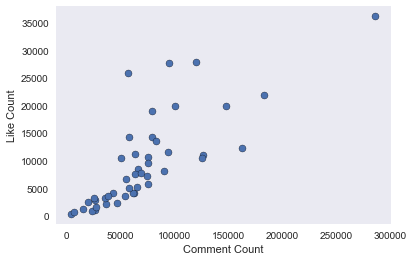

In [166]:
# create scatter plot for like count vs. comment count 
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df2["Like Count"], cleaned_df2["Comment Count"], edgecolors='black')

plt.ylabel("Like Count")

plt.xlabel("Comment Count")
plt.grid()
plt.gcf()
plt.savefig("like_vs_comments2.png", bbox_inches="tight")
plt.show()

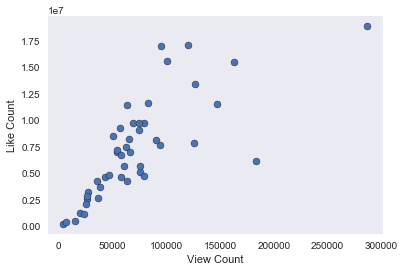

In [169]:
# create scatter plot for like count vs. view count
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df2["Like Count"], cleaned_df2["View Count"], edgecolors='black')

plt.ylabel("Like Count")
plt.xlabel("View Count")
plt.grid()
plt.savefig("like_vs_views2.png", bbox_inches="tight")
plt.show()

In [173]:
# stats for view vs. like count 
like_count2 = cleaned_df2.iloc[:,6]
view_count2 = cleaned_df2.iloc[:,5]
tt_slope, tt_intercept, tt_r_value, tt_p_value, tt_std_err = stats.linregress(view_count2, like_count2)
print(f"Slope: {tt_slope}, Intercept: {tt_intercept}, r-value: {tt_r_value}, r-squared: {tt_r_value**2}, p-val: {tt_p_value}, std-err: {tt_std_err}")

Slope: 0.008260101160268565, Intercept: 12385.416413954052, r-value: 0.759893548903499, r-squared: 0.5774382056651545, p-val: 1.418274007190459e-09, std-err: 0.0010775650445137225


In [174]:
# stats for comments vs. like count
comment_count2 = cleaned_df2.iloc[:,4]
slope, intercept, r_value, p_value, std_err = stats.linregress(comment_count2, like_count2)
print(f"Slope: {slope}, Intercept: {intercept}, r-value: {r_value}, r-squared: {r_value**2}, p-val: {p_value}, std-err: {std_err}")

Slope: 4.733069057176353, Intercept: 26639.228010559942, r-value: 0.7791897569259775, r-squared: 0.6071366772983638, p-val: 2.8919133310500125e-10, std-err: 0.5806121519747072
